# Multi-Class Classification with Perceptron

Lab Assignment from [AI for Beginners Curriculum](https://github.com/microsoft/ai-for-beginners).

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

You can use the following perceptron training code from the lecture:

In [3]:
def train(positive_examples, negative_examples, num_iterations = 100):
    num_dims = positive_examples.shape[1]
    weights = np.zeros((num_dims,1)) # initialize weights
    
    pos_count = positive_examples.shape[0]
    neg_count = negative_examples.shape[0]
    
    report_frequency = 10
    
    for i in range(num_iterations):
        pos = random.choice(positive_examples)
        neg = random.choice(negative_examples)

        z = np.dot(pos, weights)   
        if z < 0:
            weights = weights + pos.reshape(weights.shape)

        z  = np.dot(neg, weights)
        if z >= 0:
            weights = weights - neg.reshape(weights.shape)
            
        if i % report_frequency == 0:             
            pos_out = np.dot(positive_examples, weights)
            neg_out = np.dot(negative_examples, weights)        
            pos_correct = (pos_out >= 0).sum() / float(pos_count)
            neg_correct = (neg_out < 0).sum() / float(neg_count)
            print("Iteration={}, pos correct={}, neg correct={}".format(i,pos_correct,neg_correct))

    return weights

In [4]:
def accuracy(weights, test_x, test_labels):
    res = np.dot(np.c_[test_x,np.ones(len(test_x))],weights)
    return (res.reshape(test_labels.shape)*test_labels>=0).sum()/float(len(test_labels))


### Reading the Dataset

This code download the dataset from the repository on the internet. You can also manually copy the dataset from `/data` directory of AI Curriculum repo.

In [5]:
!rm *.pkl
!wget -O mnist.pkl.gz https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz\?raw\=true
!gzip -d mnist.pkl.gz

--2024-02-08 19:08:37--  https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz [following]
--2024-02-08 19:08:37--  https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mnielsen/neural-networks-and-deep-learning/master/data/mnist.pkl.gz [following]
--2024-02-08 19:08:37--  https://raw.githubusercontent.com/mnielsen/neural-networks-and-deep-learning/master/data/mnist.pkl.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Conne

In [5]:
with open('mnist.pkl', 'rb') as mnist_pickle:
    tr_d, va_d, te_d = pickle.load(mnist_pickle, encoding='latin1')


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01171875 0.0703125
 0.0703125  0.0703125  0.4921875  0.53125    0.68359375 0.1015625
 0.6484375  0.99609375 0.96484375 0.49609375 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.1171875  0.140625
 0.3671875  0.6015625 ]
5


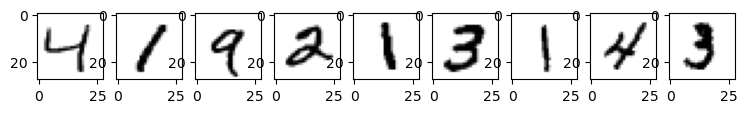

4
1
9
2
1
3
1
4
3


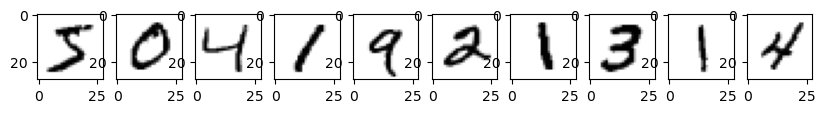

5
0
4
1
9
2
1
3
1
4


In [6]:
print(tr_d[0][0][130:180])
print(tr_d[1][0])

features = tr_d[0].astype(np.float32)
labels = tr_d[1]

def display_images(digits):
    count = len(digits)
    fig = plt.figure(figsize=(count,5))
    for i in range(count):
        ax = fig.add_subplot(1,count,i+1)
        plt.imshow(digits[i].reshape(28,28), cmap='binary')
    plt.show()

def display_labels(labels):
    for i in labels:
        print(i)

display_images(features[2:11])
display_labels(labels[2:11])
    
fig = plt.figure(figsize=(10,5))
for i in range(10):
    ax = fig.add_subplot(1,10,i+1)
    plt.imshow(features[i].reshape(28,28), cmap='binary')
plt.show()
for i in range(10):
    print(labels[i])


Code to create *one-vs-other* dataset for two-digit classification. You need to modify this code to create *one-vs-all* dateset.

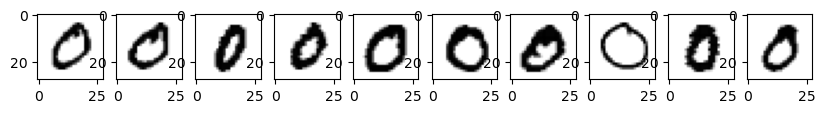

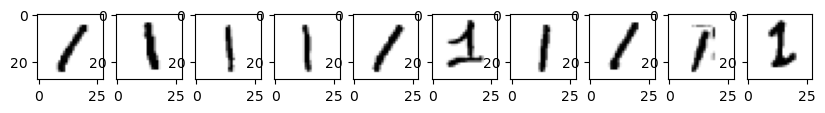

In [7]:
def set_mnist_pos_neg(positive_label, negative_label):
    positive_indices = [i for i, j in enumerate(labels) 
                          if j == positive_label]
    negative_indices = [i for i, j in enumerate(labels) 
                          if j == negative_label]

    positive_images = features[positive_indices]
    negative_images = features[negative_indices]

    return positive_images, negative_images

pos, neg = set_mnist_pos_neg(0, 1)

display_images(pos[:10])
display_images(neg[:10])

Now you need to:
1. Create 10 *one-vs-all* datasets for all digits
1. Train 10 perceptrons
1. Define `classify` function to perform digit classification
1. Measure the accuracy of classification and print *confusion matrix*
1. [Optional] Create improved `classify` function that performs the classification using one matrix multiplication.

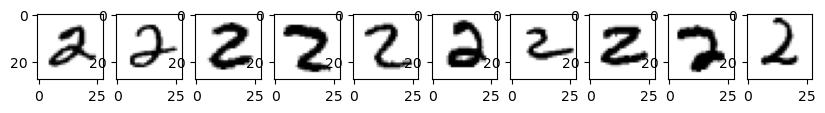

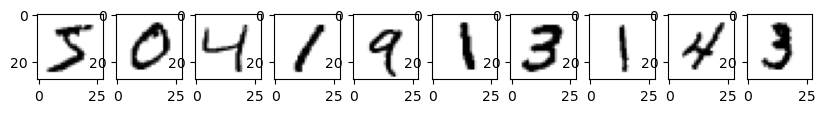

In [8]:
def set_mnist_one(label):
    pos_ind = [i for i, j in enumerate(labels) if j == label]
    neg_ind = [i for i, j in enumerate(labels) if j != label]
    pos_img = features[pos_ind]
    neg_img = features[neg_ind]
    return pos_img, neg_img

twos, not_twos = set_mnist_one(2)
display_images(twos[:10])
display_images(not_twos[:10])

In [ ]:
weights = [i for i in range(10)]
np.random.seed(1)
import random
for i in range(10):
    pos, neg = set_mnist_one(i)
    weights[i] = train(pos, neg)


In [20]:
def result(weights, x):
    np.dot(x, weights)
    
print(weights[0])
print(features[0])
#print(result(weights[0], features[0]))

#def classify(image):
    

[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.     